# Average Wages in OCSE Countries

Data is taken from [OECD library](https://www.oecd-ilibrary.org/social-issues-migration-health/data/oecd-employment-and-labour-market-statistics/average-annual-wages_data-00571-en) and published as [https://doi.org/10.1787/data-00571-en](https://doi.org/10.1787/data-00571-en)

In [131]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

In [129]:
# Load the data using pandas df
df = pd.read_csv('data/AV_AN_WAGE_31052022102120596.csv')

In [130]:
# Write a function to retrieve a series of average wages for a given country
def get_average_wages(df, country, currency='USD', time =range(1990,2020), series = 'USDPPP'):
    ave_wages = []
    for t in time:
        val= df.loc[(df['Country']==country) & (df['Unit Code']==currency) & (df['SERIES']==series) & (df['Time']==t), 'Value'].to_numpy()
        ave_wages.append(val[0] if len(val) else None)
    return ave_wages

In [112]:
# retrieve the average wages for Variuous countries
ave_wages = {}
for k in ['Germany', 'France', 'Italy', 'Spain', 'United Kingdom', 'Switzerland', 'United States']:
    ave_wages[k] = get_average_wages(df, k)

In [132]:
def plot_wages(ave_wages=[],labels=[], time=range(1990,2020), title='Average wages', xlabel='Year', ylabel='Average wage (USD)'):
    if not len(ave_wages): return None
    for i in range(len(ave_wages)): 
        plt.plot(time, ave_wages[i],label=labels[i] if i<len(labels) else None)
    if len(labels): 
        #loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, fancybox=True, shadow=True)
        plt.legend(loc='center left', bbox_to_anchor=(1, .5))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

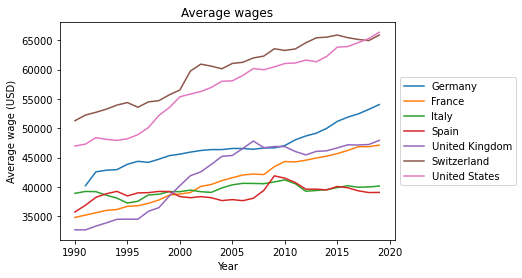

In [122]:
plot_wages([ave_wages[k] for k in ave_wages.keys()],labels = list(ave_wages.keys()))

In [125]:
def average_wage_variation(ave_wage):
    ist = 0
    first = ave_wage[ist]
    while first == None: 
        ist += 1
        first = ave_wage[ist]
    last = ave_wage[-1]
    return (last-first)/first

In [128]:
print('Average wage variation (1990-2020)')
for k in ave_wages.keys():
    print(f'{k}: {100.*average_wage_variation(ave_wages[k]):.1f}%')

Average wage variation (1990-2020)
Germany: 34.5%
France: 35.5%
Italy: 3.2%
Spain: 9.4%
United Kingdom: 46.7%
Switzerland: 28.5%
United States: 41.3%
